## **Customer Segmentation Project Using K-Means, Hierarchical and DBSCAN**


#### **Importing necessary libraries**


In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
np.random.seed(42)

#### **Loading and Exploring the Data**

In [3]:
data = pd.read_csv("Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
data.rename(
    columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendScore"},
    inplace=True,
)

In [8]:
data.head(5)

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
SpendScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
gender_counts = data["Gender"].value_counts()
gender_counts

Gender
Female    112
Male       88
Name: count, dtype: int64

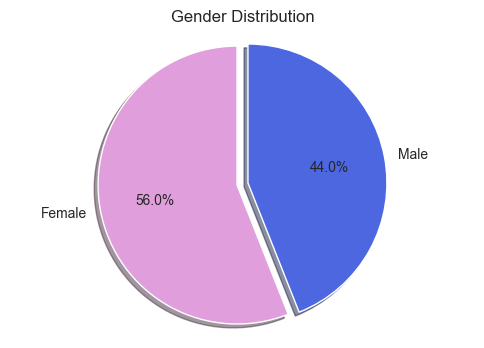

In [11]:
plt.figure(figsize=(6, 4))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    shadow=True,
    explode=np.ones(len(gender_counts)) * 0.04,
    autopct="%.1f%%",
    colors=["#E19EDC", "#4C67E0"],
    startangle=90,
)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

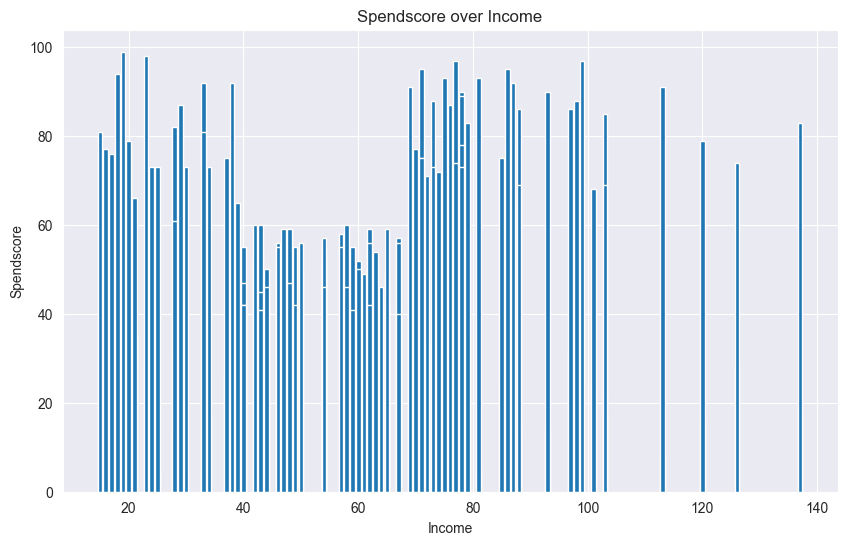

In [12]:
# Bar plot for spending score over income
plt.figure(figsize=(10, 6))
plt.bar(data["Income"], data["SpendScore"])
plt.title("Spendscore over Income")
plt.xlabel("Income")
plt.ylabel("Spendscore")
plt.show()

In [13]:
# Select the relevant columns for clustering
X = data[["Income", "SpendScore"]]
predicted_df = X.copy()

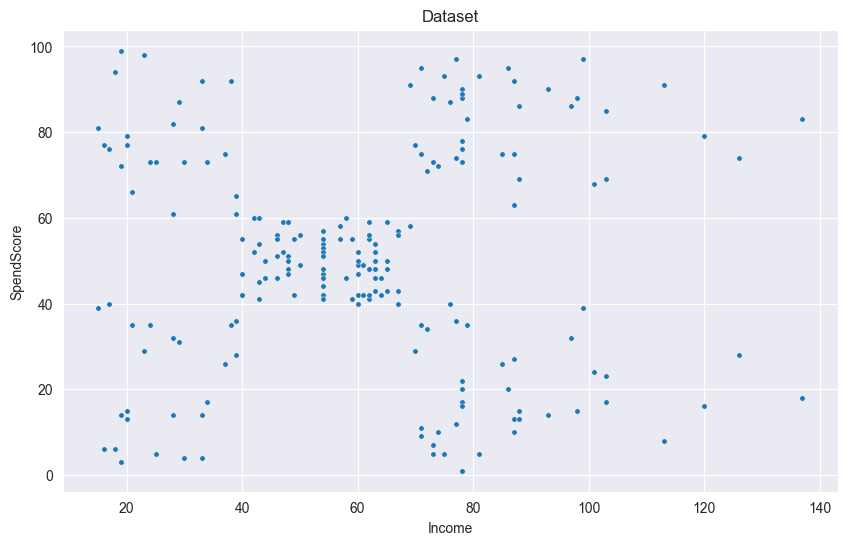

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x="Income", y="SpendScore", s=15)
plt.title("Dataset")
plt.show()

---


#### **K-Means Clustering**


In [15]:
from sklearn.cluster import KMeans

**Using the Elbow Method to Determine the Optimal Number of Clusters**


In [16]:
wcss = []
k_range = range(1, 11)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

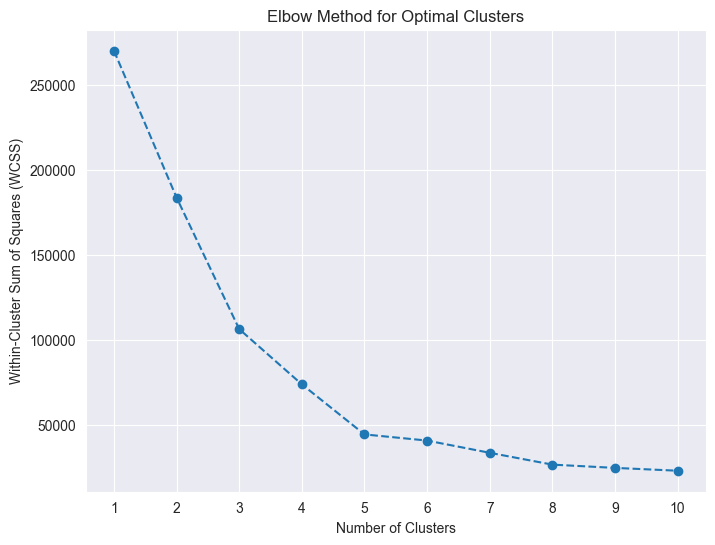

In [17]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, "--o")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(k_range)
plt.show()

**Training the K-Means Model on the Dataset**


In [18]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [19]:
predicted_df["KMeans_Clusters"] = y_kmeans
cluster_centers = kmeans.cluster_centers_

**Evaluate the Clustering Using Silhouette Score**

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
silhouette_kmeans = silhouette_score(X, predicted_df["KMeans_Clusters"])
print(f"Silhouette Score For K-Means: {silhouette_kmeans}")

Silhouette Score For K-Means: 0.553931997444648


**Visualizing K-Means Clustering Results**


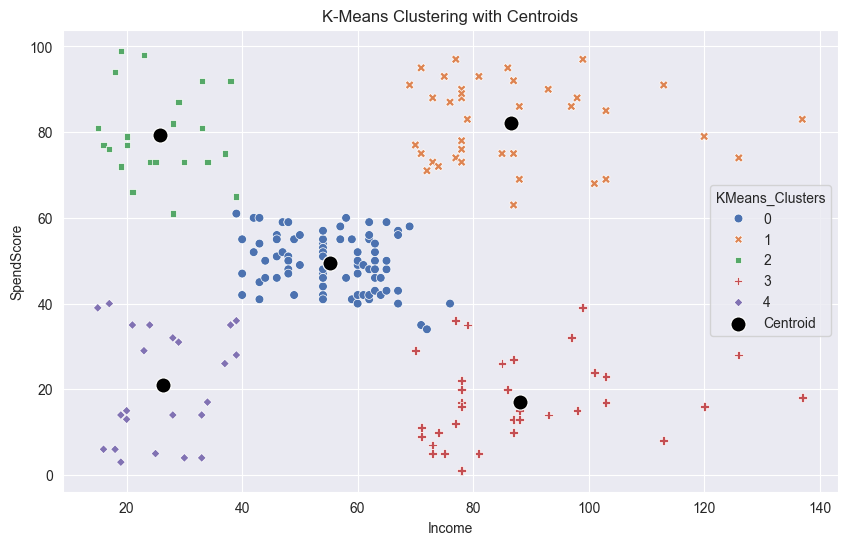

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X,
    x="Income",
    y="SpendScore",
    hue=predicted_df["KMeans_Clusters"],
    style=predicted_df["KMeans_Clusters"],
    s=40,
    palette="deep",
)
sns.scatterplot(
    x=cluster_centers[:, 0],
    y=cluster_centers[:, 1],
    color="black",
    label="Centroid",
    s=120,
)
plt.title("K-Means Clustering with Centroids")
plt.legend(title="KMeans_Clusters")
plt.show()

---


#### **Hierarchical Clustering**


In [23]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

**Using Dendrogram to Find the Optimal Number of Clusters**


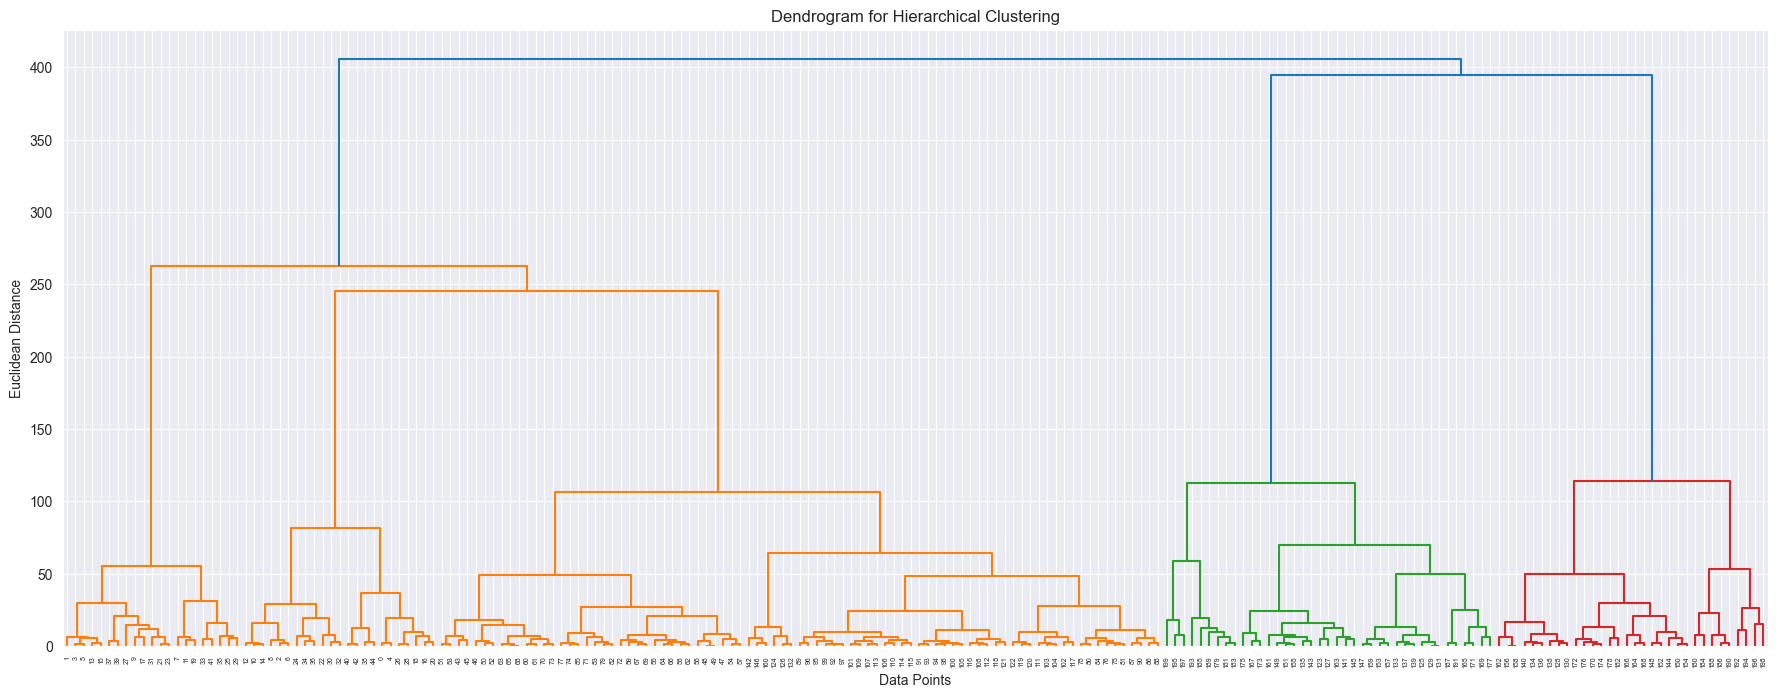

In [24]:
plt.figure(figsize=(22, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.xticks(rotation=90)
plt.show()

**Training the Hierarchical Clustering Model**


In [25]:
hc = AgglomerativeClustering(n_clusters=5, linkage="ward")
y_hc = hc.fit_predict(X)

In [26]:
predicted_df["Hierarchical_Clusters"] = y_hc

**Evaluate the Clustering Using Silhouette Score**

In [27]:
silhouette_hc = silhouette_score(X, y_hc)
print(f"Silhouette Score For Hierarchical Clustering: {silhouette_hc}")

Silhouette Score For Hierarchical Clustering: 0.5529945955148897


**Visualizing Hierarchical Clustering Results**


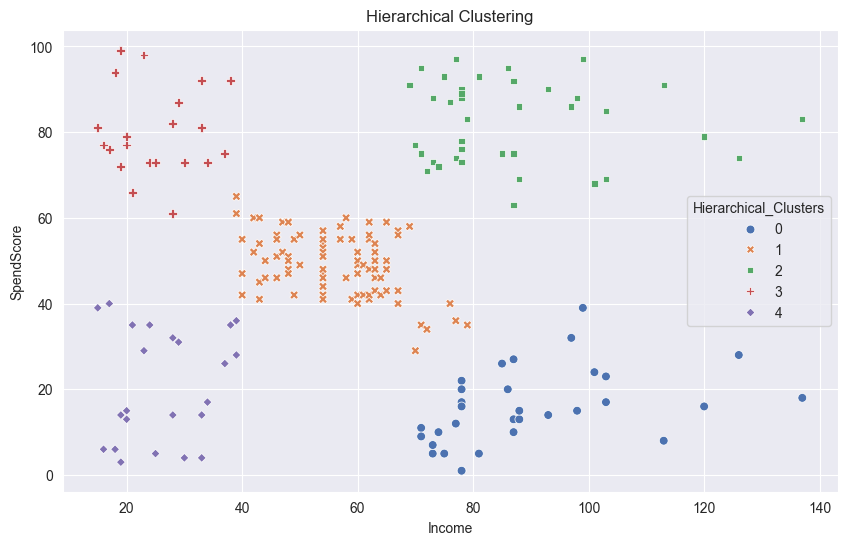

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X,
    x="Income",
    y="SpendScore",
    hue=predicted_df["Hierarchical_Clusters"],
    style=predicted_df["Hierarchical_Clusters"],
    s=40,
    palette="deep",
)
plt.title("Hierarchical Clustering")
plt.show()

---


#### **DBSCAN Clustering**


In [29]:
from sklearn.neighbors import NearestNeighbors

**Determining optimal epsilon (eps) using the K-Distance Graph**


In [30]:
nearest_neighbors = NearestNeighbors(n_neighbors=2)
nearest_neighbors.fit(X)

distances, indices = nearest_neighbors.kneighbors(X)

In [31]:
# Sort distances and focus on the second nearest neighbor distance
distances = np.sort(distances, axis=0)
second_neighbor_distances = distances[:, 1]

**Plot the K-Distance Graph to Determine eps**


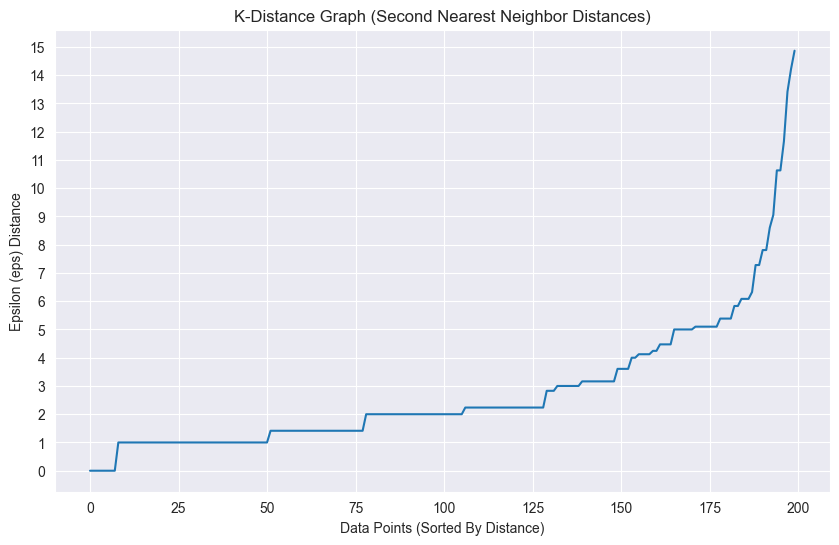

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(second_neighbor_distances)
plt.title("K-Distance Graph (Second Nearest Neighbor Distances)")
plt.xlabel("Data Points (Sorted By Distance)")
plt.ylabel("Epsilon (eps) Distance")
plt.yticks(np.arange(0, np.max(second_neighbor_distances) + 1, 1))
plt.show()

**Training the DBSCAN Clustering Model**


In [33]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=9, min_samples=5, metric="euclidean")
dbscan_model.fit(X)

DBSCAN(eps=9)

In [34]:
predicted_df["DBSCAN_Clusters"] = dbscan_model.labels_

In [35]:
# Count DBSCAN clusters
dbscan_clusters_counts = predicted_df["DBSCAN_Clusters"].value_counts().sort_index()
num_clusters = (dbscan_clusters_counts.index != -1).sum()
print(f"Number of clusters (excluding noise): {num_clusters}")

Number of clusters (excluding noise): 6


**Pie Chart of DBSCAN Cluster Distribution**


In [36]:
dbscan_clusters_counts

DBSCAN_Clusters
-1    23
 0    16
 1    12
 2     7
 3    88
 4    31
 5    23
Name: count, dtype: int64

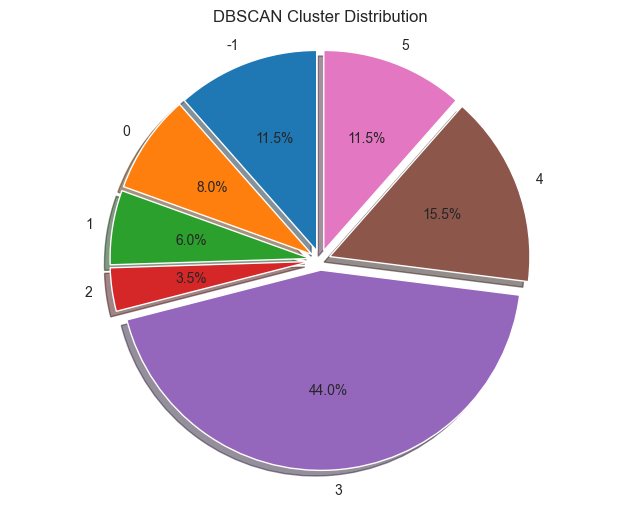

In [37]:
# Pie chart for DBSCAN cluster distribution
plt.figure(figsize=(8, 6))
plt.pie(
    dbscan_clusters_counts,
    labels=dbscan_clusters_counts.index,
    shadow=True,
    explode=np.ones(len(dbscan_clusters_counts)) * 0.05,
    autopct="%.1f%%",
    startangle=90,
)
plt.title("DBSCAN Cluster Distribution")
plt.axis("equal")
plt.show()

**Evaluate the Clustering Using Silhouette Score**

In [38]:
silhouette_dbscan = silhouette_score(X, predicted_df["DBSCAN_Clusters"])
print(f"Silhouette Score For DBSCAN: {silhouette_dbscan}")

Silhouette Score For DBSCAN: 0.43598431858196485


**Visualizing DBSCAN Clustering Results**


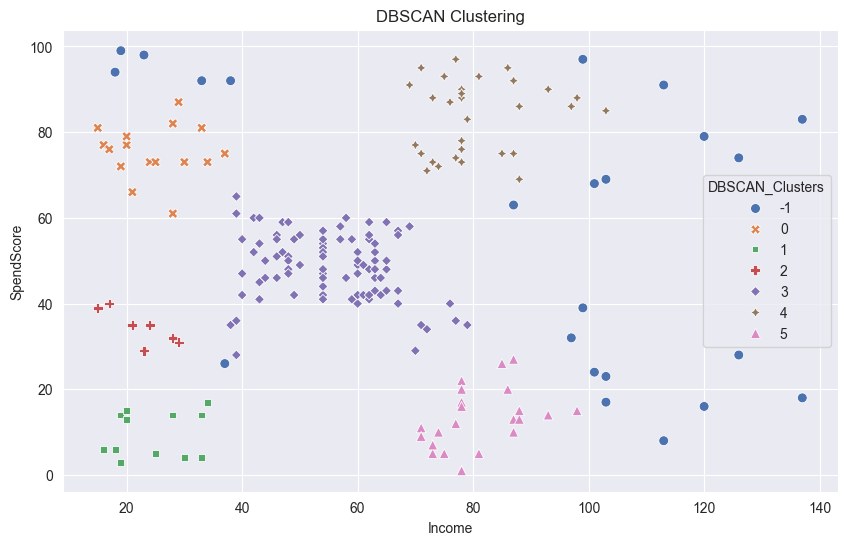

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X,
    x="Income",
    y="SpendScore",
    hue=predicted_df["DBSCAN_Clusters"],
    style=predicted_df["DBSCAN_Clusters"],
    s=50,
    palette="deep",
)
plt.title("DBSCAN Clustering")
plt.show()